In [1]:
import os
import copy
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
import cmocean
from cascade.tools import outwash_plotters as out_plt
from cascade.tools import plotters as cascade_plt

# B3D Only: Outwash module set to false

In [2]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_20yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [3]:
for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break

 Time Step:  99

Text(0, 0.5, 'shoreline position')

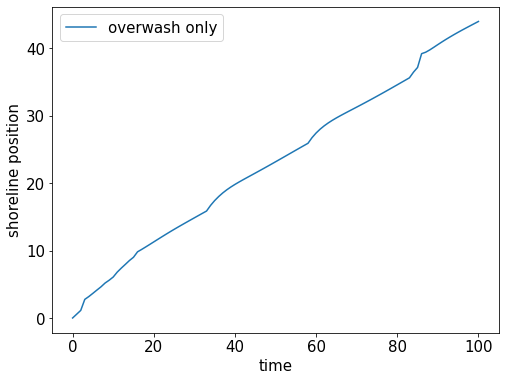

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

# 100% to shoreface

In [5]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_20yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [6]:
for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break

 Time Step:  0Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Ti

Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Time Step:  991
Outwasher Ti

Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
Outwasher Time Step:  1297
O

Outwasher Time Step:  169
Outwasher Time Step:  170
Outwasher Time Step:  171
Outwasher Time Step:  172
Outwasher Time Step:  173
Outwasher Time Step:  174
Outwasher Time Step:  175
Outwasher Time Step:  176
Outwasher Time Step:  177
Outwasher Time Step:  178
Outwasher Time Step:  179
Outwasher Time Step:  180
Outwasher Time Step:  181
Outwasher Time Step:  182
Outwasher Time Step:  183
Outwasher Time Step:  184
Outwasher Time Step:  185
Outwasher Time Step:  186
Outwasher Time Step:  187
Outwasher Time Step:  188
Outwasher Time Step:  189
Outwasher Time Step:  190
Outwasher Time Step:  191
Outwasher Time Step:  192
Outwasher Time Step:  193
Outwasher Time Step:  194
Outwasher Time Step:  195
Outwasher Time Step:  196
Outwasher Time Step:  197
Outwasher Time Step:  198
Outwasher Time Step:  199
Outwasher Time Step:  200
Outwasher Time Step:  201
Outwasher Time Step:  202
Outwasher Time Step:  203
Outwasher Time Step:  204
Outwasher Time Step:  205
Outwasher Time Step:  206
Outwasher Ti

Outwasher Time Step:  485
Outwasher Time Step:  486
Outwasher Time Step:  487
Outwasher Time Step:  488
Outwasher Time Step:  489
Outwasher Time Step:  490
Outwasher Time Step:  491
Outwasher Time Step:  492
Outwasher Time Step:  493
Outwasher Time Step:  494
Outwasher Time Step:  495
Outwasher Time Step:  496
Outwasher Time Step:  497
Outwasher Time Step:  498
Outwasher Time Step:  499
Outwasher Time Step:  500
Outwasher Time Step:  501
Outwasher Time Step:  502
Outwasher Time Step:  503
Outwasher Time Step:  504
Outwasher Time Step:  505
Outwasher Time Step:  506
Outwasher Time Step:  507
Outwasher Time Step:  508
Outwasher Time Step:  509
Outwasher Time Step:  510
Outwasher Time Step:  511
Outwasher Time Step:  512
Outwasher Time Step:  513
Outwasher Time Step:  514
Outwasher Time Step:  515
Outwasher Time Step:  516
Outwasher Time Step:  517
Outwasher Time Step:  518
Outwasher Time Step:  519
Outwasher Time Step:  520
Outwasher Time Step:  521
Outwasher Time Step:  522
Outwasher Ti

Outwasher Time Step:  801
Outwasher Time Step:  802
Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Time Step:  822
Outwasher Time Step:  823
Outwasher Time Step:  824
Outwasher Time Step:  825
Outwasher Time Step:  826
Outwasher Time Step:  827
Outwasher Time Step:  828
Outwasher Time Step:  829
Outwasher Time Step:  830
Outwasher Time Step:  831
Outwasher Time Step:  832
Outwasher Time Step:  833
Outwasher Time Step:  834
Outwasher Time Step:  835
Outwasher Time Step:  836
Outwasher Time Step:  837
Outwasher Time Step:  838
Outwasher Ti

Outwasher Time Step:  1112
Outwasher Time Step:  1113
Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
Outwasher Time Step:  1125
Outwasher Time Step:  1126
Outwasher Time Step:  1127
Outwasher Time Step:  1128
Outwasher Time Step:  1129
Outwasher Time Step:  1130
Outwasher Time Step:  1131
Outwasher Time Step:  1132
Outwasher Time Step:  1133
Outwasher Time Step:  1134
Outwasher Time Step:  1135
Outwasher Time Step:  1136
Outwasher Time Step:  1137
Outwasher Time Step:  1138
Outwasher Time Step:  1139
Outwasher Time Step:  1140
Outwasher Time Step:  1141
Outwasher Time Step:  1142
Outwasher Time Step:  1143
Outwasher Time Step:  1144
Outwasher Time Step:  1145
Outwasher Time Step:  1146
Outwasher Time Step:  1147
Outwasher Time Step:  1148
O

Outwasher Time Step:  1416
Outwasher Time Step:  1417
Outwasher Time Step:  1418
Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
Outwasher Time Step:  1423
Outwasher Time Step:  1424
Outwasher Time Step:  1425
Outwasher Time Step:  1426
Outwasher Time Step:  1427
Outwasher Time Step:  1428
Outwasher Time Step:  1429
Outwasher Time Step:  1430
Outwasher Time Step:  1431
Outwasher Time Step:  1432
Outwasher Time Step:  1433
Outwasher Time Step:  1434
Outwasher Time Step:  1435
Outwasher Time Step:  1436
Outwasher Time Step:  1437
Outwasher Time Step:  1438
Outwasher Time Step:  1439
Outwasher Time Step:  1440
Outwasher Time Step:  1441
Outwasher Time Step:  1442
Outwasher Time Step:  1443
Outwasher Time Step:  1444
Outwasher Time Step:  1445
Outwasher Time Step:  1446
Outwasher Time Step:  1447
Outwasher Time Step:  1448
Outwasher Time Step:  1449
Outwasher Time Step:  1450
Outwasher Time Step:  1451
 Time Step:  22

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  40Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

Outwasher Time Step:  635
Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Ti

Outwasher Time Step:  951
Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

Text(0, 0.5, 'shoreline position')

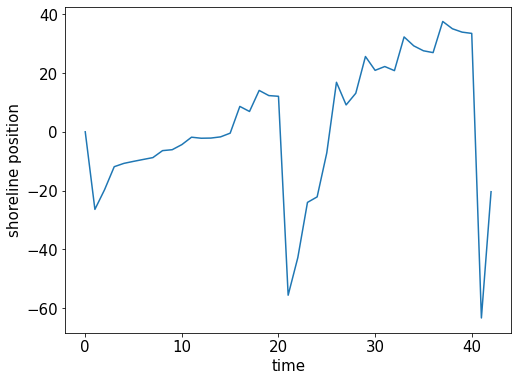

In [7]:
m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

plt.plot(m_xsTS_100)
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")


In [8]:
cascade_outwash100.barrier3d[0].BermEl

0.10999999999999999

Text(0.5, 1.0, 'Outwash to Shoreface')

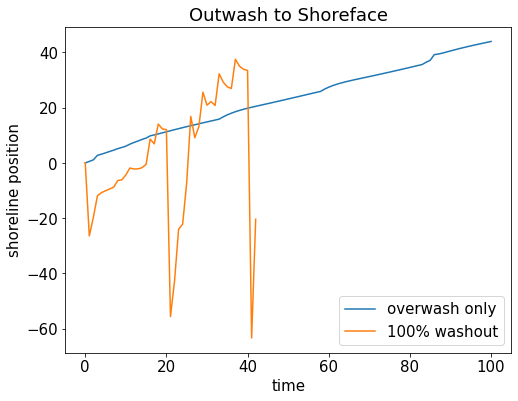

In [9]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")



# 50% Outwash to shoreface

In [10]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_20yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [11]:
for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break

 Time Step:  0Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

Outwasher Time Step:  230
Outwasher Time Step:  231
Outwasher Time Step:  232
Outwasher Time Step:  233
Outwasher Time Step:  234
Outwasher Time Step:  235
Outwasher Time Step:  236
Outwasher Time Step:  237
Outwasher Time Step:  238
Outwasher Time Step:  239
Outwasher Time Step:  240
Outwasher Time Step:  241
Outwasher Time Step:  242
Outwasher Time Step:  243
Outwasher Time Step:  244
Outwasher Time Step:  245
Outwasher Time Step:  246
Outwasher Time Step:  247
Outwasher Time Step:  248
Outwasher Time Step:  249
Outwasher Time Step:  250
Outwasher Time Step:  251
Outwasher Time Step:  252
Outwasher Time Step:  253
Outwasher Time Step:  254
Outwasher Time Step:  255
Outwasher Time Step:  256
Outwasher Time Step:  257
Outwasher Time Step:  258
Outwasher Time Step:  259
Outwasher Time Step:  260
Outwasher Time Step:  261
Outwasher Time Step:  262
Outwasher Time Step:  263
Outwasher Time Step:  264
Outwasher Time Step:  265
Outwasher Time Step:  266
Outwasher Time Step:  267
Outwasher Ti

 Time Step:  40Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  629
Outwasher Time Step:  630
Outwasher Time Step:  631
Outwasher Time Step:  632
Outwasher Time Step:  633
Outwasher Time Step:  634
Outwasher Time Step:  635
Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Ti

 Time Step:  60Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Ti

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
O

Outwasher Time Step:  170
Outwasher Time Step:  171
Outwasher Time Step:  172
Outwasher Time Step:  173
Outwasher Time Step:  174
Outwasher Time Step:  175
Outwasher Time Step:  176
Outwasher Time Step:  177
Outwasher Time Step:  178
Outwasher Time Step:  179
Outwasher Time Step:  180
Outwasher Time Step:  181
Outwasher Time Step:  182
Outwasher Time Step:  183
Outwasher Time Step:  184
Outwasher Time Step:  185
Outwasher Time Step:  186
Outwasher Time Step:  187
Outwasher Time Step:  188
Outwasher Time Step:  189
Outwasher Time Step:  190
Outwasher Time Step:  191
Outwasher Time Step:  192
Outwasher Time Step:  193
Outwasher Time Step:  194
Outwasher Time Step:  195
Outwasher Time Step:  196
Outwasher Time Step:  197
Outwasher Time Step:  198
Outwasher Time Step:  199
Outwasher Time Step:  200
Outwasher Time Step:  201
Outwasher Time Step:  202
Outwasher Time Step:  203
Outwasher Time Step:  204
Outwasher Time Step:  205
Outwasher Time Step:  206
Outwasher Time Step:  207
Outwasher Ti

Outwasher Time Step:  486
Outwasher Time Step:  487
Outwasher Time Step:  488
Outwasher Time Step:  489
Outwasher Time Step:  490
Outwasher Time Step:  491
Outwasher Time Step:  492
Outwasher Time Step:  493
Outwasher Time Step:  494
Outwasher Time Step:  495
Outwasher Time Step:  496
Outwasher Time Step:  497
Outwasher Time Step:  498
Outwasher Time Step:  499
Outwasher Time Step:  500
Outwasher Time Step:  501
Outwasher Time Step:  502
Outwasher Time Step:  503
Outwasher Time Step:  504
Outwasher Time Step:  505
Outwasher Time Step:  506
Outwasher Time Step:  507
Outwasher Time Step:  508
Outwasher Time Step:  509
Outwasher Time Step:  510
Outwasher Time Step:  511
Outwasher Time Step:  512
Outwasher Time Step:  513
Outwasher Time Step:  514
Outwasher Time Step:  515
Outwasher Time Step:  516
Outwasher Time Step:  517
Outwasher Time Step:  518
Outwasher Time Step:  519
Outwasher Time Step:  520
Outwasher Time Step:  521
Outwasher Time Step:  522
Outwasher Time Step:  523
Outwasher Ti

Outwasher Time Step:  803
Outwasher Time Step:  804
Outwasher Time Step:  805
Outwasher Time Step:  806
Outwasher Time Step:  807
Outwasher Time Step:  808
Outwasher Time Step:  809
Outwasher Time Step:  810
Outwasher Time Step:  811
Outwasher Time Step:  812
Outwasher Time Step:  813
Outwasher Time Step:  814
Outwasher Time Step:  815
Outwasher Time Step:  816
Outwasher Time Step:  817
Outwasher Time Step:  818
Outwasher Time Step:  819
Outwasher Time Step:  820
Outwasher Time Step:  821
Outwasher Time Step:  822
Outwasher Time Step:  823
Outwasher Time Step:  824
Outwasher Time Step:  825
Outwasher Time Step:  826
Outwasher Time Step:  827
Outwasher Time Step:  828
Outwasher Time Step:  829
Outwasher Time Step:  830
Outwasher Time Step:  831
Outwasher Time Step:  832
Outwasher Time Step:  833
Outwasher Time Step:  834
Outwasher Time Step:  835
Outwasher Time Step:  836
Outwasher Time Step:  837
Outwasher Time Step:  838
Outwasher Time Step:  839
Outwasher Time Step:  840
Outwasher Ti

Outwasher Time Step:  1114
Outwasher Time Step:  1115
Outwasher Time Step:  1116
Outwasher Time Step:  1117
Outwasher Time Step:  1118
Outwasher Time Step:  1119
Outwasher Time Step:  1120
Outwasher Time Step:  1121
Outwasher Time Step:  1122
Outwasher Time Step:  1123
Outwasher Time Step:  1124
Outwasher Time Step:  1125
Outwasher Time Step:  1126
Outwasher Time Step:  1127
Outwasher Time Step:  1128
Outwasher Time Step:  1129
Outwasher Time Step:  1130
Outwasher Time Step:  1131
Outwasher Time Step:  1132
Outwasher Time Step:  1133
Outwasher Time Step:  1134
Outwasher Time Step:  1135
Outwasher Time Step:  1136
Outwasher Time Step:  1137
Outwasher Time Step:  1138
Outwasher Time Step:  1139
Outwasher Time Step:  1140
Outwasher Time Step:  1141
Outwasher Time Step:  1142
Outwasher Time Step:  1143
Outwasher Time Step:  1144
Outwasher Time Step:  1145
Outwasher Time Step:  1146
Outwasher Time Step:  1147
Outwasher Time Step:  1148
Outwasher Time Step:  1149
Outwasher Time Step:  1150
O

Outwasher Time Step:  1419
Outwasher Time Step:  1420
Outwasher Time Step:  1421
Outwasher Time Step:  1422
Outwasher Time Step:  1423
Outwasher Time Step:  1424
Outwasher Time Step:  1425
Outwasher Time Step:  1426
Outwasher Time Step:  1427
Outwasher Time Step:  1428
Outwasher Time Step:  1429
Outwasher Time Step:  1430
Outwasher Time Step:  1431
Outwasher Time Step:  1432
Outwasher Time Step:  1433
Outwasher Time Step:  1434
Outwasher Time Step:  1435
Outwasher Time Step:  1436
Outwasher Time Step:  1437
Outwasher Time Step:  1438
Outwasher Time Step:  1439
Outwasher Time Step:  1440
Outwasher Time Step:  1441
Outwasher Time Step:  1442
Outwasher Time Step:  1443
Outwasher Time Step:  1444
Outwasher Time Step:  1445
Outwasher Time Step:  1446
Outwasher Time Step:  1447
Outwasher Time Step:  1448
Outwasher Time Step:  1449
Outwasher Time Step:  1450
Outwasher Time Step:  1451
 Time Step:  99

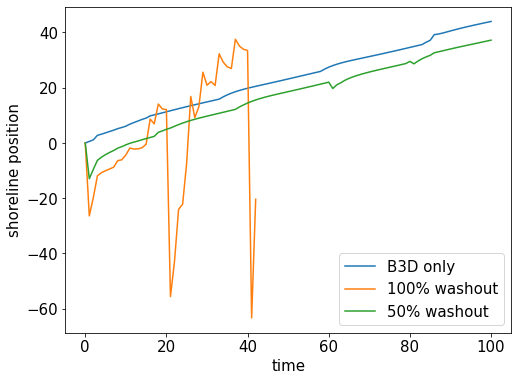

In [12]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# washout lost

In [13]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_20yrs_early.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=3.65E-3,
    cx=0.675
)

In [14]:
for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break

 Time Step:  0Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Ti

Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Time Step:  991
Outwasher Ti

Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
Outwasher Time Step:  1297
O

Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Time Step:  358
Outwasher Time Step:  359
Outwasher Time Step:  360
Outwasher Time Step:  361
Outwasher Time Step:  362
Outwasher Time Step:  363
Outwasher Time Step:  364
Outwasher Time Step:  365
Outwasher Time Step:  366
Outwasher Time Step:  367
Outwasher Time Step:  368
Outwasher Time Step:  369
Outwasher Time Step:  370
Outwasher Time Step:  371
Outwasher Time Step:  372
Outwasher Time Step:  373
Outwasher Time Step:  374
Outwasher Ti

Outwasher Time Step:  696
Outwasher Time Step:  697
Outwasher Time Step:  698
Outwasher Time Step:  699
Outwasher Time Step:  700
Outwasher Time Step:  701
Outwasher Time Step:  702
Outwasher Time Step:  703
Outwasher Time Step:  704
Outwasher Time Step:  705
Outwasher Time Step:  706
Outwasher Time Step:  707
Outwasher Time Step:  708
Outwasher Time Step:  709
Outwasher Time Step:  710
Outwasher Time Step:  711
Outwasher Time Step:  712
Outwasher Time Step:  713
Outwasher Time Step:  714
Outwasher Time Step:  715
Outwasher Time Step:  716
Outwasher Time Step:  717
Outwasher Time Step:  718
Outwasher Time Step:  719
Outwasher Time Step:  720
Outwasher Time Step:  721
Outwasher Time Step:  722
Outwasher Time Step:  723
Outwasher Time Step:  724
Outwasher Time Step:  725
Outwasher Time Step:  726
Outwasher Time Step:  727
Outwasher Time Step:  728
Outwasher Time Step:  729
Outwasher Time Step:  730
Outwasher Time Step:  731
Outwasher Time Step:  732
Outwasher Time Step:  733
Outwasher Ti

 Time Step:  40Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  1153
Outwasher Time Step:  1154
Outwasher Time Step:  1155
Outwasher Time Step:  1156
Outwasher Time Step:  1157
Outwasher Time Step:  1158
Outwasher Time Step:  1159
Outwasher Time Step:  1160
Outwasher Time Step:  1161
Outwasher Time Step:  1162
Outwasher Time Step:  1163
Outwasher Time Step:  1164
Outwasher Time Step:  1165
Outwasher Time Step:  1166
Outwasher Time Step:  1167
Outwasher Time Step:  1168
Outwasher Time Step:  1169
Outwasher Time Step:  1170
Outwasher Time Step:  1171
Outwasher Time Step:  1172
Outwasher Time Step:  1173
Outwasher Time Step:  1174
Outwasher Time Step:  1175
Outwasher Time Step:  1176
Outwasher Time Step:  1177
Outwasher Time Step:  1178
Outwasher Time Step:  1179
Outwasher Time Step:  1180
Outwasher Time Step:  1181
Outwasher Time Step:  1182
Outwasher Time Step:  1183
Outwasher Time Step:  1184
Outwasher Time Step:  1185
Outwasher Time Step:  1186
Outwasher Time Step:  1187
Outwasher Time Step:  1188
Outwasher Time Step:  1189
O

Outwasher Time Step:  492
Outwasher Time Step:  493
Outwasher Time Step:  494
Outwasher Time Step:  495
Outwasher Time Step:  496
Outwasher Time Step:  497
Outwasher Time Step:  498
Outwasher Time Step:  499
Outwasher Time Step:  500
Outwasher Time Step:  501
Outwasher Time Step:  502
Outwasher Time Step:  503
Outwasher Time Step:  504
Outwasher Time Step:  505
Outwasher Time Step:  506
Outwasher Time Step:  507
Outwasher Time Step:  508
Outwasher Time Step:  509
Outwasher Time Step:  510
Outwasher Time Step:  511
Outwasher Time Step:  512
Outwasher Time Step:  513
Outwasher Time Step:  514
Outwasher Time Step:  515
Outwasher Time Step:  516
Outwasher Time Step:  517
Outwasher Time Step:  518
Outwasher Time Step:  519
Outwasher Time Step:  520
Outwasher Time Step:  521
Outwasher Time Step:  522
Outwasher Time Step:  523
Outwasher Time Step:  524
Outwasher Time Step:  525
Outwasher Time Step:  526
Outwasher Time Step:  527
Outwasher Time Step:  528
Outwasher Time Step:  529
Outwasher Ti

Outwasher Time Step:  998
Outwasher Time Step:  999
Outwasher Time Step:  1000
Outwasher Time Step:  1001
Outwasher Time Step:  1002
Outwasher Time Step:  1003
Outwasher Time Step:  1004
Outwasher Time Step:  1005
Outwasher Time Step:  1006
Outwasher Time Step:  1007
Outwasher Time Step:  1008
Outwasher Time Step:  1009
Outwasher Time Step:  1010
Outwasher Time Step:  1011
Outwasher Time Step:  1012
Outwasher Time Step:  1013
Outwasher Time Step:  1014
Outwasher Time Step:  1015
Outwasher Time Step:  1016
Outwasher Time Step:  1017
Outwasher Time Step:  1018
Outwasher Time Step:  1019
Outwasher Time Step:  1020
Outwasher Time Step:  1021
Outwasher Time Step:  1022
Outwasher Time Step:  1023
Outwasher Time Step:  1024
Outwasher Time Step:  1025
Outwasher Time Step:  1026
Outwasher Time Step:  1027
Outwasher Time Step:  1028
Outwasher Time Step:  1029
Outwasher Time Step:  1030
Outwasher Time Step:  1031
Outwasher Time Step:  1032
Outwasher Time Step:  1033
Outwasher Time Step:  1034
Out

 Time Step:  80Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Time Step:  900
Outwasher Time Step:  901
Outwasher Time Step:  902
Outwasher Time Step:  903
Outwasher Time Step:  904
Outwasher Time Step:  905
Outwasher Time Step:  906
Outwasher Time Step:  907
Outwasher Time Step:  908
Outwasher Time Step:  909
Outwasher Time Step:  910
Outwasher Time Step:  911
Outwasher Time Step:  912
Outwasher Time Step:  913
Outwasher Time Step:  914
Outwasher Time Step:  915
Outwasher Time Step:  916
Outwasher Time Step:  917
Outwasher Time Step:  918
Outwasher Time Step:  919
Outwasher Time Step:  920
Outwasher Time Step:  921
Outwasher Time Step:  922
Outwasher Ti

 Time Step:  99

# plotting results

In [59]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams.update({"font.size": 15})
ls="dashed"

## shoreline position

-55.605217733397865
5.402148137322911


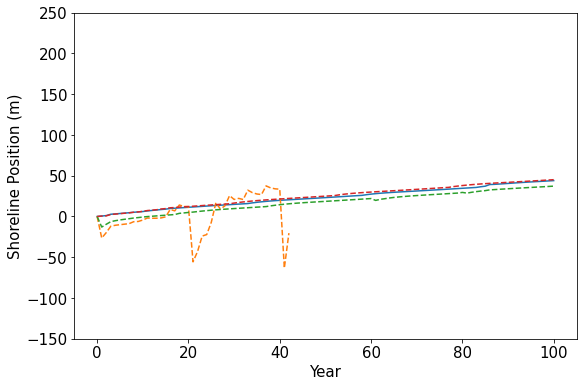

In [69]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_0, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreline Position (m)")
# plt.legend()

print(m_xsTS_100[21])
print(m_xsTS_50[21])


plt.ylim((-150, 250))
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\shorepos_035.jpg")

In [17]:
# plt.rcParams['figure.figsize'] = (12,6)

# m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
# m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.xlabel("time")
# plt.ylabel("shoreline position")

# plt.plot(m_xsTS, label="landward-directed flows")
# # plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
# # plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
# plt.plot(m_xsTS_0, label="landward- and seaward-directed flows", linestyle="solid")

# plt.xlabel("Year")
# plt.ylabel("Barrier Migration (m)")
# plt.legend()


## avg interior elevation

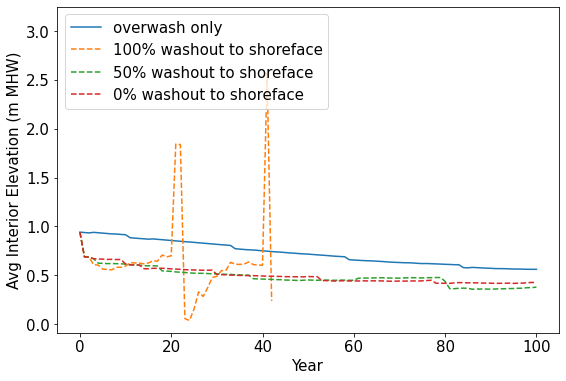

In [64]:
hbTS = np.array(cascade_b3d_only.barrier3d[0].h_b_TS)*10
hbTS2 = np.array(cascade_outwash100.barrier3d[0].h_b_TS)*10
hbTS3 = np.array(cascade_outwash50.barrier3d[0].h_b_TS)*10
hbTS4 = np.array(cascade_outwash0.barrier3d[0].h_b_TS)*10

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(hbTS, label="overwash only")
plt.plot(hbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(hbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(hbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Elevation (m MHW)")
plt.legend(loc="upper left")
# plt.title("Avg Interior Elevation (m)")

plt.ylim(top=3.25)
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\avg_int_035.jpg")

## avg barrier width 

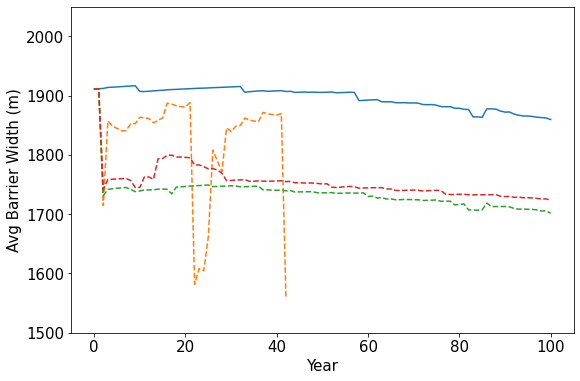

In [63]:
xbTS = np.array(cascade_b3d_only.barrier3d[0].x_b_TS)*10
xbTS2 = np.array(cascade_outwash100.barrier3d[0].x_b_TS)*10
xbTS3 = np.array(cascade_outwash50.barrier3d[0].x_b_TS)*10
xbTS4 = np.array(cascade_outwash0.barrier3d[0].x_b_TS)*10

plt.rcParams.update({"font.size": 15})

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Barrier Width (m)")
# plt.legend()

plt.ylim((1500, 2050))
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\avg_width_035.jpg")

## overwash flux

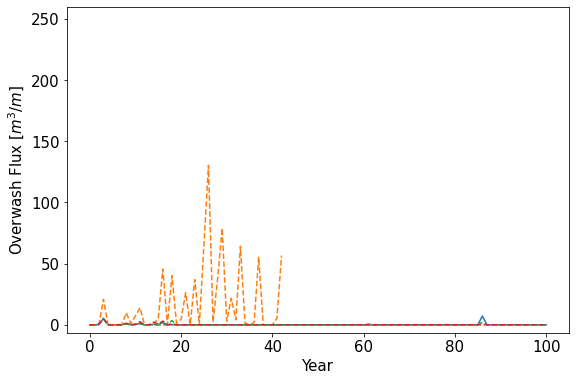

In [65]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (9,6)

plt.plot(OWTS, label="overwash only")
plt.plot(OWTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(OWTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(OWTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
# plt.legend()
# plt.title("Overwash")

plt.ylim(top=260)
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\overwash_035.jpg")

## Outwash Volume

In [66]:
# volTS = cascade_b3d_only.outwash[0]._outwash_TS #m3/m
# volTS2 = cascade_outwash100.outwash[0]._outwash_TS #m3/m
# volTS3 = cascade_outwash50.outwash[0]._outwash_TS #m3/m
# volTS4 = cascade_outwash0.outwash[0]._outwash_TS #m3/m

# plt.plot(volTS, label="overwash only")
# plt.plot(volTS2, label="100% washout to shoreface", linestyle=ls)
# plt.plot(volTS3, label="50% washout to shoreface", linestyle=ls)
# plt.plot(volTS4, label="0% washout to shoreface", linestyle=ls)

# plt.xlabel("Year")
# plt.ylabel("Outwash Volume [$m^3$]")
# plt.legend(loc="upper right")

# # plt.title("Overwash")

## Outwash Flux

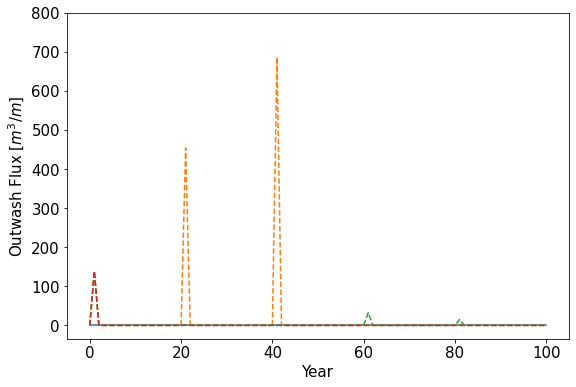

In [67]:
fluxTS = cascade_b3d_only.outwash[0]._outwash_flux_TS #m3/m
fluxTS2 = cascade_outwash100.outwash[0]._outwash_flux_TS #m3/m
fluxTS3 = cascade_outwash50.outwash[0]._outwash_flux_TS #m3/m
fluxTS4 = cascade_outwash0.outwash[0]._outwash_flux_TS #m3/m

plt.plot(fluxTS, label="overwash only")
plt.plot(fluxTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(fluxTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(fluxTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Flux [$m^3/m$]")
# plt.legend(loc="upper right")
# plt.title("Overwash")

plt.ylim(top=800)
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\outwash_035.jpg")

## shoreface slope

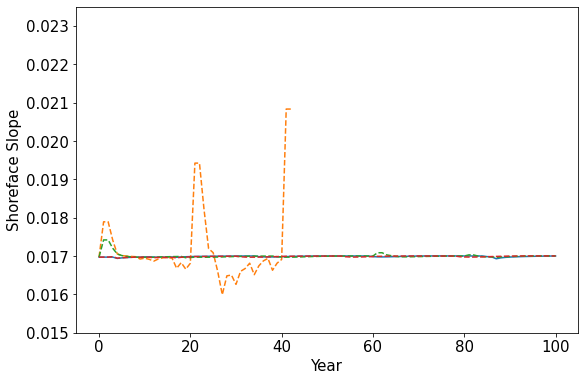

In [68]:
sfTS = cascade_b3d_only.barrier3d[0].s_sf_TS 
sfTS2 = cascade_outwash100.barrier3d[0].s_sf_TS 
sfTS3 = cascade_outwash50.barrier3d[0].s_sf_TS 
sfTS4 = cascade_outwash0.barrier3d[0].s_sf_TS 

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(sfTS, label="overwash only")
plt.plot(sfTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(sfTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(sfTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreface Slope")
# plt.legend()
# plt.title("Shoreface Slope")

plt.ylim((0.015, 0.0235))

plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\shoreface_slope_035.jpg")

## Dunes

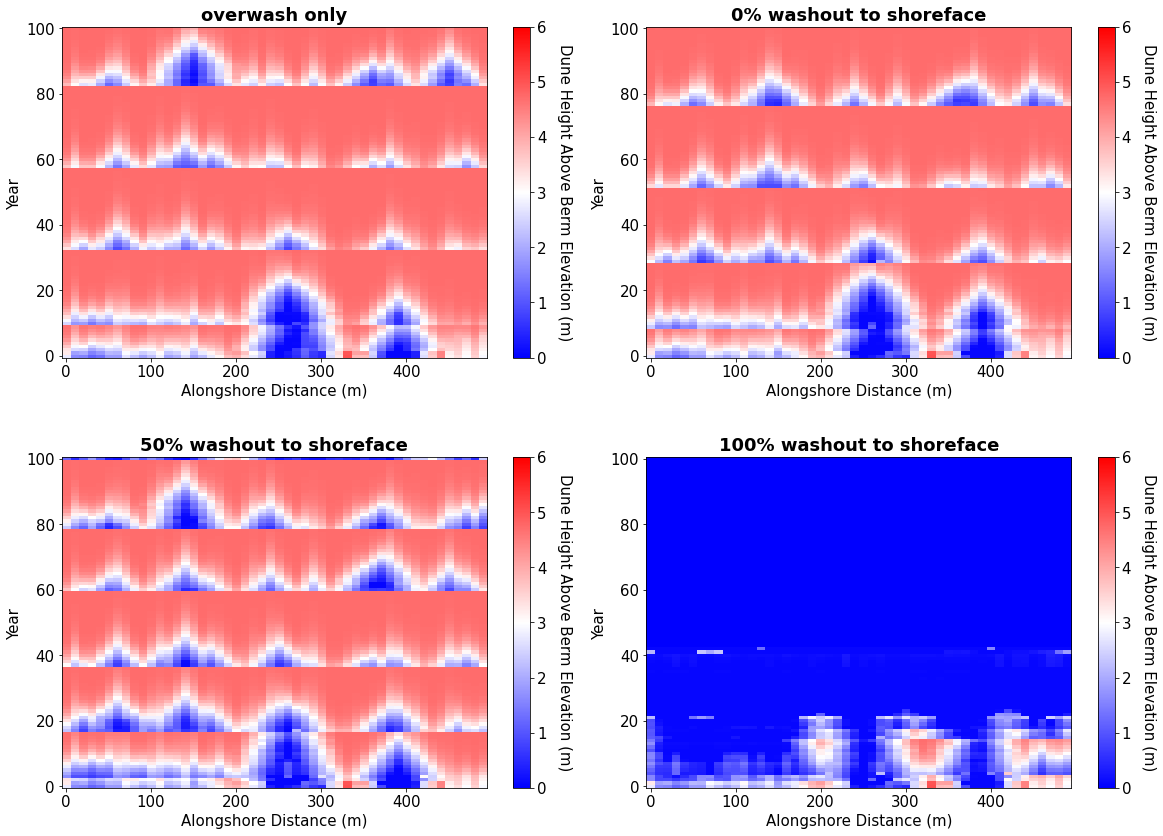

In [70]:
TMAX=101
vmin=0
vmax=6


# Barrier3d only

b3d = cascade_b3d_only.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

duneFig = plt.figure(figsize=(20, 14))
plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(221)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("overwash only", weight="bold")
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)

xtick_max = np.shape(DuneCrest)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)

# cascade 100%

b3d = cascade_outwash100.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(224)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("100% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

# cascade 50%

b3d = cascade_outwash50.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(223)
cax = ax.matshow(
    np.flip((DuneCrest),1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("50% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)

# cascade 0%

b3d = cascade_outwash0.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(222)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("0% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)


plt.subplots_adjust(hspace=0.3, wspace=0.1)

In [51]:
# domain 0
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[0]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[1]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[20]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[22]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[22] 
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[40]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[40] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[41]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[41] 
domain41 = np.vstack([dunes, interior])

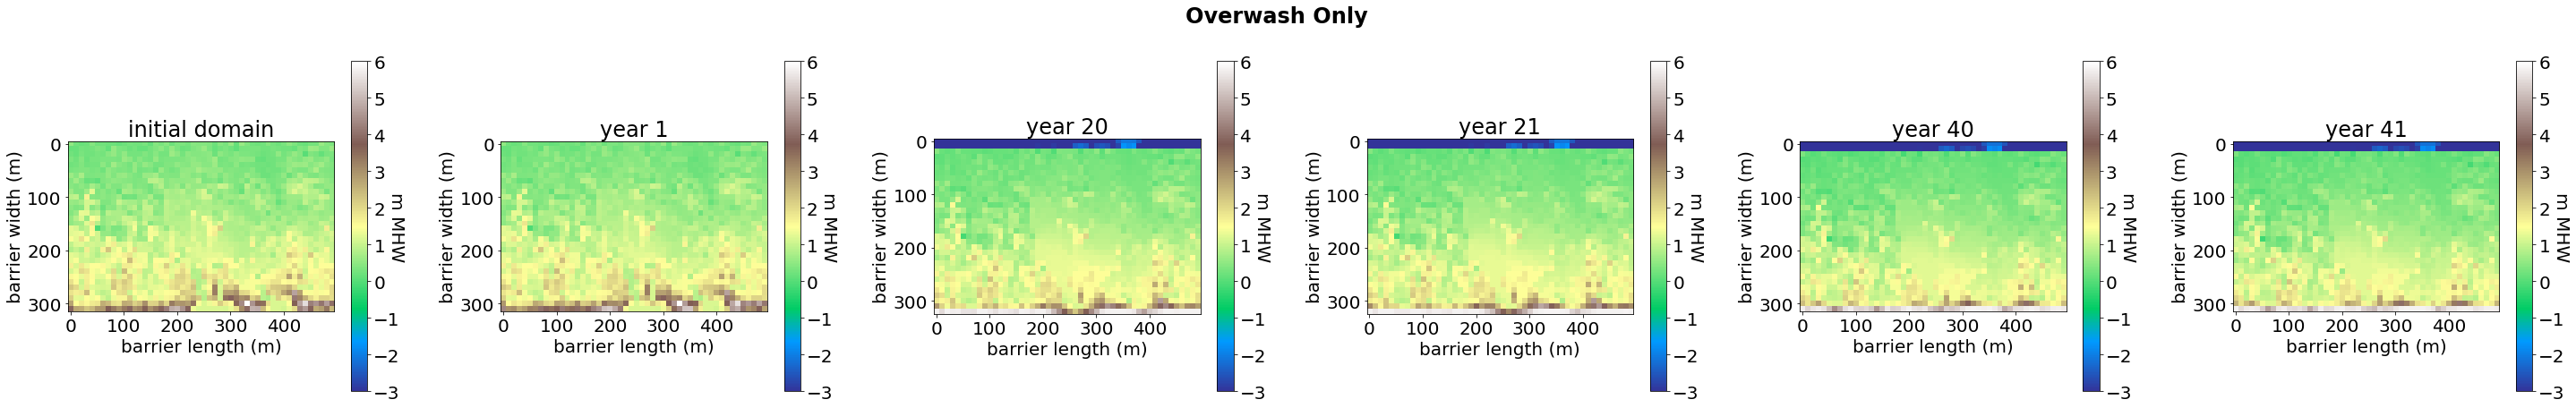

In [52]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('Overwash Only', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 40")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 41")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

In [53]:
# domain 0
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[1]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[20]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[22]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[22] 
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[40]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[40] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[41]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[41] 
domain41 = np.vstack([dunes, interior])

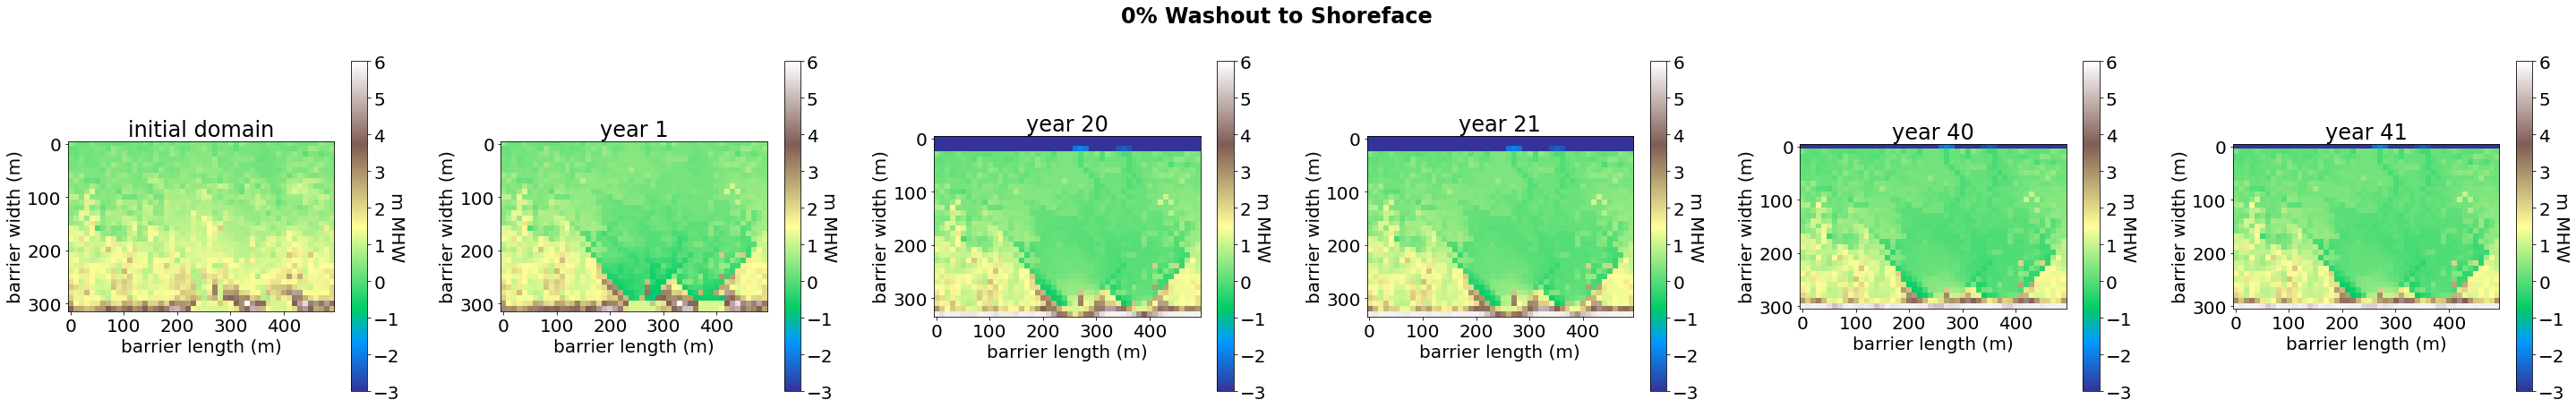

In [54]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('0% Washout to Shoreface', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 40")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 41")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

In [55]:
# domain 0
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[0]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[1]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[20]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[22]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[22] 
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[40]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[40] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[41]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[41] 
domain41 = np.vstack([dunes, interior])

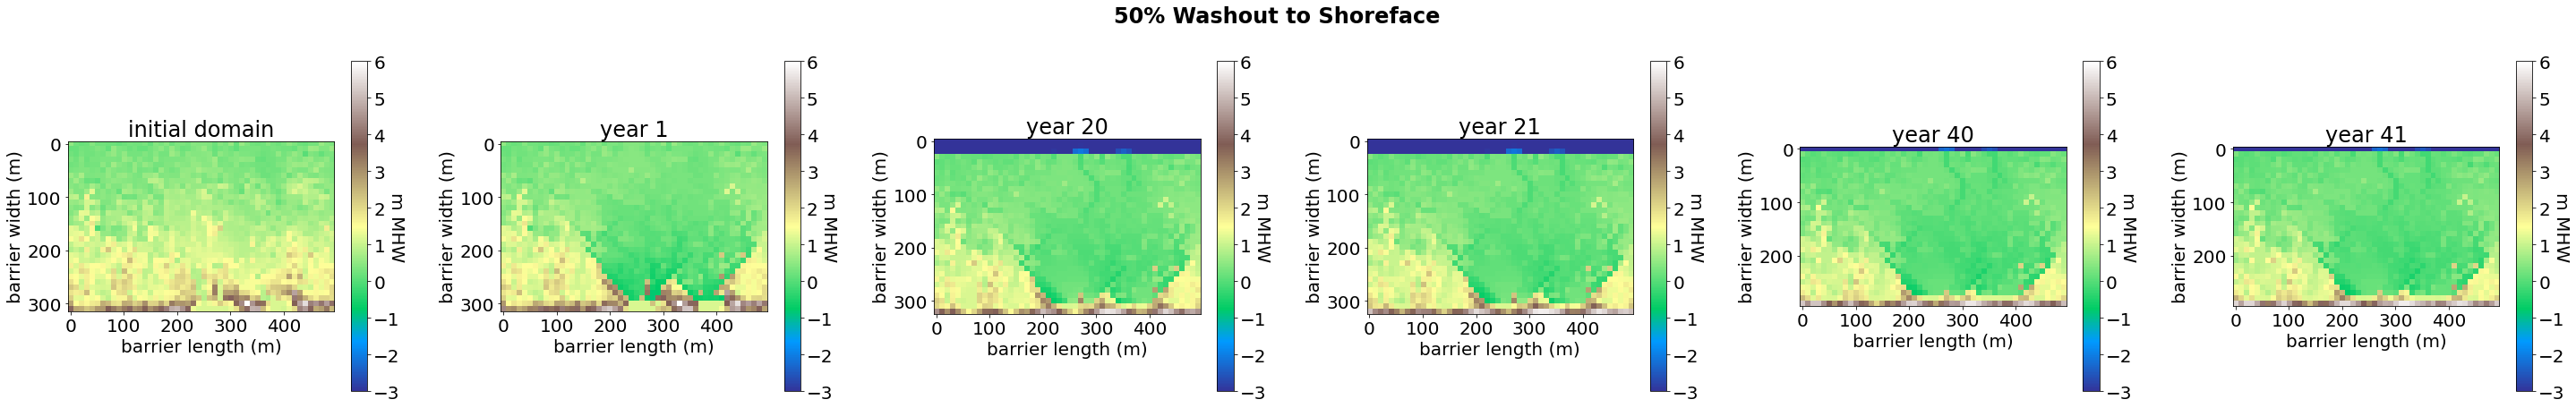

In [56]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('50% Washout to Shoreface', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 40")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 41")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

In [57]:
# domain 0
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[0]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[1]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[20]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[22]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[22] 
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[40]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[40] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[41]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[41] 
domain41 = np.vstack([dunes, interior])

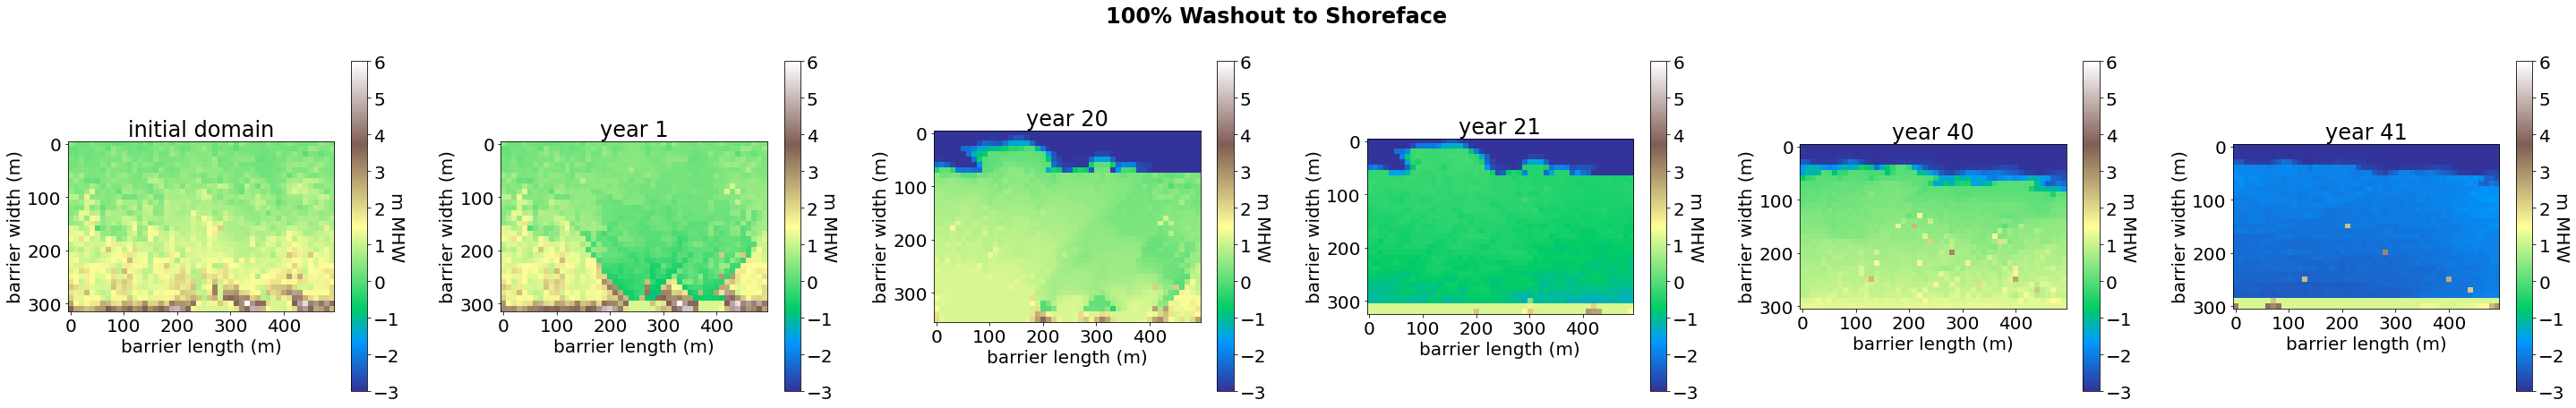

In [58]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('100% Washout to Shoreface', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 40")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 41")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

# elevation plots

In [33]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_b3d_only.barrier3d[0]._DuneDomain, 
#     interior=cascade_b3d_only.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg_max/b3d_only/", 
#     start=0, 
#     stop=cascade_b3d_only.barrier3d[0].TMAX, 
#     freq=1,
#     berm_el=cascade_b3d_only.barrier3d[0].BermEl)

In [34]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_outwash100.barrier3d[0]._DuneDomain, 
#     interior=cascade_outwash100.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade100/", 
#     start=0, 
#     stop=cascade_outwash100.barrier3d[0].TMAX, 
#     freq=1,
#     berm_el=cascade_outwash100.barrier3d[0].BermEl)

In [35]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_outwash50.barrier3d[0]._DuneDomain, 
#     interior=cascade_outwash50.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade50/", 
#     start=0, 
#     stop=cascade_outwash50.barrier3d[0].TMAX, 
#     freq=1, 
#     berm_el=cascade_outwash50.barrier3d[0].BermEl)

In [36]:
# out_plt.plot_ElevAnimation(
#     dunes=cascade_outwash0.barrier3d[0]._DuneDomain, 
#     interior=cascade_outwash0.barrier3d[0]._DomainTS, 
#     directory="C:/Users/Lexi/Documents/Research/Thesis/left_seg/cascade0/", 
#     start=0, 
#     stop=cascade_outwash0.barrier3d[0].TMAX, 
#     freq=1, 
#     berm_el=cascade_outwash50.barrier3d[0].BermEl)

In [37]:
# uw = cascade_outwash100.outwash[0]._underwater_array[20][500]
# dh = cascade_outwash100.outwash[0]._downhill_array[20][500]
# end = cascade_outwash100.outwash[0]._endcell_array[20][500]

# plt.rcParams['figure.figsize'] = (10,6)
# plt.rcParams.update({"font.size": 15})

# fig4 = plt.figure()
# ax4 = fig4.add_subplot(111)
# mat4 = ax4.matshow(
#     uw,
#     cmap="binary",
#     vmin=0, vmax=3,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Submerged Array")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(uw)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(uw)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)


# fig4 = plt.figure()
# ax4 = fig4.add_subplot(111)
# mat4 = ax4.matshow(
#     dh,
#     cmap="binary",
#     vmin=0, vmax=3,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# # ax4.set_title("Downhill and Underwater Cells")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(dh)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(dh)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)
# plt.text(0.5, 3.5, "Light Grey = submerged cells \nDark Grey = downhill cells", fontsize="small")


# fig4 = plt.figure()
# ax4 = fig4.add_subplot(111)
# mat4 = ax4.matshow(
#     end,
#     cmap="binary",
#     vmin=0, vmax=3,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# # ax4.set_title("Endcell Array")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(end)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(end)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)
# plt.text(0.5, 5.5, "Light Grey = submerged cells \nDark Grey = downhill cells \nBlack = end cells", fontsize="small")
# # plt.hlines(32.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)
# # plt.hlines(34.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)

In [38]:
# plt.rcParams['figure.figsize'] = (20,6)
# plt.rcParams.update({"font.size": 15})
# # plt.plot(cascade_outwash100.outwash[0]._final_bay_levels)
# # np.argmax(cascade_outwash100.outwash[0]._final_bay_levels)

# # init_dis2 = cascade_outwash100.outwash[0]._initial_discharge[20][360] 
# # discharge2 = cascade_outwash100.outwash[0]._discharge[20][360]
# # row = np.shape(init_dis)[0]
# # col = np.shape(init_dis)[1]
# # for r in range(row):
# #     for c in range(col):
# #         init_dis2[r,c] = init_dis2[r,c]*1000/3600
# #         discharge2[r,c] = discharge2[r,c]*1000/3600


# fig4 = plt.figure()
# ax4 = fig4.add_subplot(121)
# mat4 = ax4.matshow(
#     init_dis2,
#     cmap="Blues",
#     vmin=0, 
#     vmax=20,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Initial Discharge")
# plt.gca().xaxis.tick_bottom()
# cbar = fig4.colorbar(mat4)
# cbar.set_label('m$^3$/s', rotation=270, labelpad=25)
# xtick_max = np.shape(init_dis)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(init_dis)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)


# ax4 = fig4.add_subplot(122)
# mat4 = ax4.matshow(
#     discharge2,
#     cmap="Blues",
#     vmin=0, 
#     vmax=200,
# )
# ax4.set_xlabel('barrier length (m)')
# ax4.set_ylabel('barrier width (m)')
# ax4.set_title("Discharge After Flow Routing")
# plt.gca().xaxis.tick_bottom()
# cbar = fig4.colorbar(mat4)
# cbar.set_label('m$^3$/s', rotation=270, labelpad=25)
# xtick_max = np.shape(discharge)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(discharge)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)

# print(cascade_outwash100.outwash[0]._final_bay_levels[360])
# plt.hlines(32.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)
# plt.hlines(34.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=1)

In [39]:
# dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
# interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
# domain = np.vstack([dunes, interior])

# min_v = -3
# max_v = 6

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     domain*10,
#     cmap="terrain",
#     vmin=min_v, vmax=max_v,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# # ax1.set_title("")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()


# # domain 19 
# dunes19 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[19]) + cascade_outwash0.barrier3d[0].BermEl
# interior19 = cascade_outwash0.barrier3d[0]._DomainTS[19] 
# domain19 = np.vstack([dunes19, interior19])
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     domain19*10,
#     cmap="terrain",
#     vmin=min_v, vmax=max_v,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# # ax1.set_title("")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()

# # domain 20 
# dunes20 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[21]) + cascade_outwash0.barrier3d[0].BermEl
# interior20 = cascade_outwash0.barrier3d[0]._DomainTS[21] 
# domain20 = np.vstack([dunes20, interior20])
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     domain20*10,
#     cmap="terrain",
#     vmin=min_v, vmax=max_v,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# # ax1.set_title("")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()

# # domain 39 
# dunes39 = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[39]) + cascade_outwash0.barrier3d[0].BermEl
# interior39 = cascade_outwash0.barrier3d[0]._DomainTS[39] 
# domain39 = np.vstack([dunes39, interior39])
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     domain39*10,
#     cmap="terrain",
#     vmin=min_v, vmax=max_v,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# # ax1.set_title("")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()

In [40]:
print(cascade_b3d_only.barrier3d[0]._Dmaxel)

0.584
